In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork

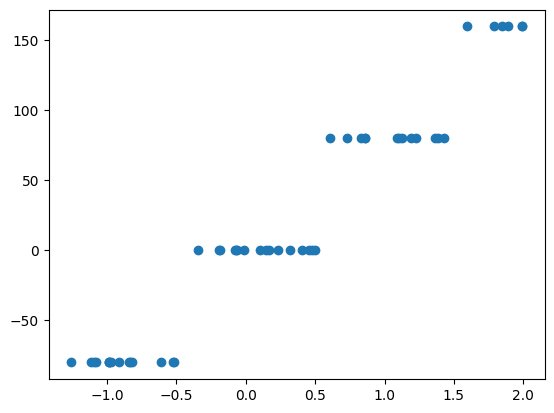

In [3]:
data_step_train = pd.read_csv("dane_nn2/steps-small-training.csv")
data_step_train = data_step_train.drop(data_step_train.columns[0], axis=1)
data_step_train.head()
X_step_train = data_step_train['x'].values.reshape(-1, 1)
y_step_train = data_step_train['y'].values.reshape(-1, 1)

plt.scatter(X_step_train, y_step_train)
plt.show()

Starting MSE: 6615.36
Epoch 0, MSE: 6615.36
Epoch 1000, MSE: 0.31
Epoch 2000, MSE: 0.30
Epoch 3000, MSE: 0.30
Epoch 4000, MSE: 0.30
Epoch 5000, MSE: 0.30
Epoch 6000, MSE: 0.29
Epoch 7000, MSE: 0.30
Epoch 8000, MSE: 0.30
Epoch 9000, MSE: 0.30
Epoch 10000, MSE: 0.30
Epoch 11000, MSE: 0.29
Epoch 12000, MSE: 0.29
Epoch 13000, MSE: 0.29
Epoch 14000, MSE: 0.29
Epoch 15000, MSE: 0.29
Epoch 16000, MSE: 0.29
Epoch 17000, MSE: 0.29
Epoch 18000, MSE: 0.29
Epoch 19000, MSE: 0.29
Epoch 20000, MSE: 0.29
Epoch 21000, MSE: 0.29
Epoch 22000, MSE: 0.29
Epoch 23000, MSE: 0.29
Epoch 24000, MSE: 0.29
Epoch 25000, MSE: 0.29
Epoch 26000, MSE: 0.29
Epoch 27000, MSE: 0.29
Epoch 28000, MSE: 0.28
Epoch 29000, MSE: 0.28
Epoch 30000, MSE: 0.28
Epoch 31000, MSE: 0.29
Epoch 32000, MSE: 0.29
Epoch 33000, MSE: 0.34
Epoch 34000, MSE: 0.29
Epoch 35000, MSE: 0.31
Epoch 36000, MSE: 0.33
Epoch 37000, MSE: 0.32
Epoch 38000, MSE: 0.37
Epoch 39000, MSE: 0.32
Epoch 40000, MSE: 0.33
Epoch 41000, MSE: 0.33
Epoch 42000, MSE: 0.33

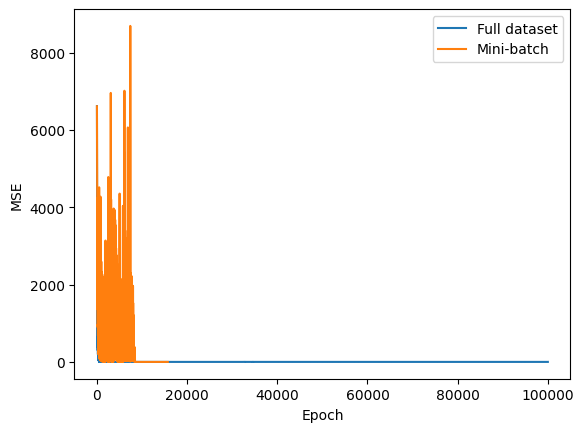

In [4]:
nn = NeuralNetwork(layers=[1, 10, 10, 1], activation_fun='sigmoid')
history, wh = nn.train(X_step_train, y_step_train, 0.1, int(1e5), stop_condition=0.001)

nn2 = NeuralNetwork([1, 10, 10, 1])
history_batch, whb = nn2.train(X_step_train, y_step_train, 0.01, int(1e5), mini_batch=True, batch_size=16, stop_condition=0.001)

plt.plot(history, label="Full dataset")
plt.plot(history_batch, label="Mini-batch")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Full dataset MSE:  49.0046500558787
Mini-batch MSE:  261.1227431410785


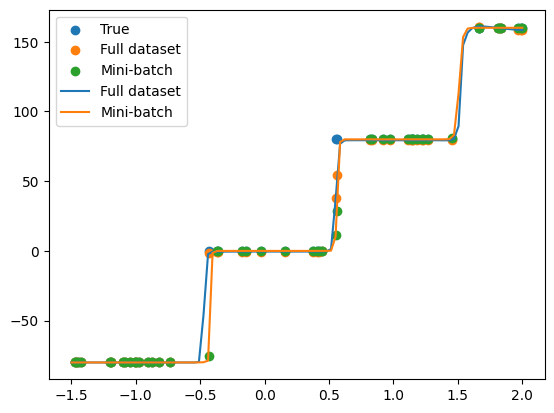

In [5]:
data_step_test = pd.read_csv("dane_nn2/steps-small-test.csv")
data_step_test = data_step_test.drop(data_step_test.columns[0], axis=1)
X_step_test = data_step_test['x'].values.reshape(-1, 1)
y_step_test = data_step_test['y'].values.reshape(-1, 1)

y_pred = nn.predict(X_step_test)
y_pred_batch = nn2.predict(X_step_test)

print("Full dataset MSE: ", np.mean((y_step_test - y_pred) ** 2))
print("Mini-batch MSE: ", np.mean((y_step_test - y_pred_batch) ** 2))

x = np.linspace(-1.5, 2, 100).reshape(-1, 1)

plt.scatter(X_step_test, y_step_test, label="True")
plt.scatter(X_step_test, y_pred, label="Full dataset")
plt.scatter(X_step_test, y_pred_batch, label="Mini-batch")
plt.plot(x, nn.predict(x), label="Full dataset")
plt.plot(x, nn2.predict(x), label="Mini-batch")
plt.legend()
plt.show()

In [6]:
data_square_train = pd.read_csv("dane_nn2/square-simple-training.csv")
data_square_train = data_square_train.drop(data_square_train.columns[0], axis=1)
data_square_train.head()
X_square_train = data_square_train['x'].values.reshape(-1, 1)
y_square_train = data_square_train['y'].values.reshape(-1, 1)

In [10]:
nn_square = NeuralNetwork([1, 16, 32, 16, 1], activation_fun='sigmoid')
h1, wh1 = nn_square.train(X_square_train, y_square_train, 0.01, int(2e4), stop_condition=1)
h, wh1 = nn_square.train(X_square_train, y_square_train, 0.001, int(1e4), stop_condition=1)
h, wh1 = nn_square.train(X_square_train, y_square_train, 0.0001, int(1e4), stop_condition=1)
h, wh1 = nn_square.train(X_square_train, y_square_train, 0.00001, int(1e4), stop_condition=0.5)

nn_square2 = NeuralNetwork([1, 16, 32, 16, 1], activation_fun='sigmoid')
h2, wh2 = nn_square2.train(X_square_train, y_square_train, 0.1, int(1e4), mini_batch=True, batch_size=64, stop_condition=1)
h2, wh2 = nn_square2.train(X_square_train, y_square_train, 0.01, int(2e4), mini_batch=True, batch_size=64, stop_condition=1)
h, wh2 = nn_square2.train(X_square_train, y_square_train, 0.001, int(1e4), mini_batch=True, batch_size=64, stop_condition=1)
h, wh2 = nn_square2.train(X_square_train, y_square_train, 0.0001, int(1e4), mini_batch=True, batch_size=64, stop_condition=1)
h, wh2 = nn_square2.train(X_square_train, y_square_train, 0.00001, int(1e4), mini_batch=True, batch_size=64, stop_condition=0.5)



# plt.plot(h1, label="Full dataset")
# plt.plot(h2, label="Mini-batch")
# plt.xlabel("Epoch")
# plt.ylabel("MSE")
# plt.legend()
# plt.show()


Starting MSE: 10112.41
Epoch 0, MSE: 10112.41
Epoch 1000, MSE: 6964.84
Epoch 2000, MSE: 3496.11
Epoch 3000, MSE: 3560.18
Epoch 4000, MSE: 3272.97
Epoch 5000, MSE: 763.70
Epoch 6000, MSE: 4920.19
Epoch 7000, MSE: 629.47
Epoch 8000, MSE: 1375.45
Epoch 9000, MSE: 230.54
Epoch 10000, MSE: 339.40
Epoch 11000, MSE: 685.53
Epoch 12000, MSE: 100.24
Epoch 13000, MSE: 272.76
Epoch 14000, MSE: 772.45
Epoch 15000, MSE: 112.39
Epoch 16000, MSE: 89.25
Epoch 17000, MSE: 134.97
Epoch 18000, MSE: 49.22
Epoch 19000, MSE: 55.17
Final MSE: 322.55833090053426 after 20000 epochs
Starting MSE: 305.81
Epoch 20000, MSE: 305.81
Epoch 21000, MSE: 2.92
Epoch 22000, MSE: 2.09
Epoch 23000, MSE: 1.74
Epoch 24000, MSE: 1.60
Epoch 25000, MSE: 1.48
Epoch 26000, MSE: 1.47
Epoch 27000, MSE: 1.33
Epoch 28000, MSE: 1.38
Epoch 29000, MSE: 1.25
Final MSE: 1.113922586214635 after 30000 epochs
Starting MSE: 1.13
Epoch 30000, MSE: 1.13
Final MSE: 0.999916510445257 after 30015 epochs
Starting MSE: 1.00
Epoch 30015, MSE: 1.00
Epo

In [11]:
h1, h2 = nn_square.train(X_square_train, y_square_train, 0.00001, int(2e4), stop_condition=0.01)
h1, h2 = nn_square.train(X_square_train, y_square_train, 0.000001, int(2e4), stop_condition=0.01)
h1, h2 = nn_square.train(X_square_train, y_square_train, 0.0000001, int(2e4), stop_condition=0.01)
h1, h2 = nn_square.train(X_square_train, y_square_train, 0.00000001, int(2e4), stop_condition=0.01)
h1, h2 = nn_square.train(X_square_train, y_square_train, 0.000000001, int(2e4), stop_condition=0.01)
h1, h2 = nn_square.train(X_square_train, y_square_train, 0.0000000001, int(2e4), stop_condition=0.01)


h1, h2 = nn_square2.train(X_square_train, y_square_train, 0.00001, int(2e4), mini_batch=True, batch_size=64, stop_condition=0.01)
h1, h2 = nn_square2.train(X_square_train, y_square_train, 0.000001, int(2e4), mini_batch=True, batch_size=64, stop_condition=0.01)
h1, h2 = nn_square2.train(X_square_train, y_square_train, 0.0000001, int(2e4), mini_batch=True, batch_size=64, stop_condition=0.01)
h1, h2 = nn_square2.train(X_square_train, y_square_train, 0.00000001, int(2e4), mini_batch=True, batch_size=64, stop_condition=0.01)
h1, h2 = nn_square2.train(X_square_train, y_square_train, 0.000000001, int(2e4), mini_batch=True, batch_size=64, stop_condition=0.01)


Starting MSE: 0.50
Epoch 37594, MSE: 0.50
Epoch 38594, MSE: 0.48
Epoch 39594, MSE: 0.45
Epoch 40594, MSE: 0.43
Epoch 41594, MSE: 0.41
Epoch 42594, MSE: 0.39
Epoch 43594, MSE: 0.37
Epoch 44594, MSE: 0.35
Epoch 45594, MSE: 0.33
Epoch 46594, MSE: 0.32
Epoch 47594, MSE: 0.30
Epoch 48594, MSE: 0.28
Epoch 49594, MSE: 0.26
Epoch 50594, MSE: 0.25
Epoch 51594, MSE: 0.23
Epoch 52594, MSE: 0.22
Epoch 53594, MSE: 0.20
Epoch 54594, MSE: 0.19
Epoch 55594, MSE: 0.18
Epoch 56594, MSE: 0.17
Final MSE: 0.1574415471146308 after 57594 epochs
Starting MSE: 0.16
Epoch 57594, MSE: 0.16
Epoch 58594, MSE: 0.16
Epoch 59594, MSE: 0.16
Epoch 60594, MSE: 0.15
Epoch 61594, MSE: 0.15
Epoch 62594, MSE: 0.15
Epoch 63594, MSE: 0.15
Epoch 64594, MSE: 0.15
Epoch 65594, MSE: 0.15
Epoch 66594, MSE: 0.15
Epoch 67594, MSE: 0.15
Epoch 68594, MSE: 0.15
Epoch 69594, MSE: 0.14
Epoch 70594, MSE: 0.14
Epoch 71594, MSE: 0.14
Epoch 72594, MSE: 0.14
Epoch 73594, MSE: 0.14
Epoch 74594, MSE: 0.14
Epoch 75594, MSE: 0.14
Epoch 76594, MSE

MSE for full:  5.826452815286163
MSE for mini-batch:  105.37379552232642


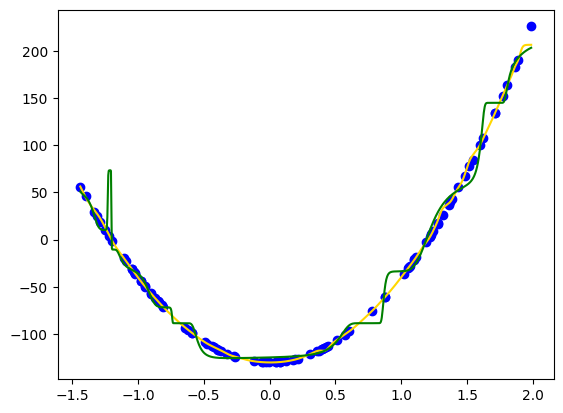

In [12]:
data_square_test = pd.read_csv("dane_nn2/square-simple-test.csv")
data_square_test = data_square_test.drop(data_square_test.columns[0], axis=1)
data_square_test.head()
X_square_test = data_square_test['x'].values.reshape(-1, 1)
y_square_test = data_square_test['y'].values.reshape(-1, 1)

y_square_pred = nn_square.predict(X_square_test)
mse_square = np.mean(np.square(y_square_test - y_square_pred))
print("MSE for full: ", mse_square)

y_square_pred2 = nn_square2.predict(X_square_test)
mse_square2 = np.mean(np.square(y_square_test - y_square_pred2))
print("MSE for mini-batch: ", mse_square2)

x = np.linspace(min(X_square_test), max(X_square_test), 1000)
plt.scatter(X_square_test, y_square_test, color='blue')
plt.plot(x, nn_square.predict(x), color='gold')
plt.plot(x, nn_square2.predict(x), color='green')
plt.show()

In [13]:
multimodal_train = pd.read_csv("dane_nn2/multimodal-large-training.csv")
multimodal_train.head()
X_multimodal_train = multimodal_train['x'].values.reshape(-1, 1)
y_multimodal_train = multimodal_train['y'].values.reshape(-1, 1)

In [14]:
nn_multimodal = NeuralNetwork([1, 32, 64, 32, 1], activation_fun='sigmoid')
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.02, int(1e3), stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.01, int(1e3), stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.001, int(1e3), stop_condition=1, report_interval=10)

nn_multimodal2 = NeuralNetwork([1, 32, 64, 32, 1], activation_fun='sigmoid')
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.02, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.01, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.001, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)


# plt.plot(h1, label="Full dataset")
# plt.plot(h1, label="Mini-batch")
# plt.xlabel("Epoch")
# plt.ylabel("MSE")
# plt.legend()
# plt.show()



Starting MSE: 5320.79
Epoch 0, MSE: 5320.79
Epoch 10, MSE: 4990.61
Epoch 20, MSE: 4457.24
Epoch 30, MSE: 4610.77
Epoch 40, MSE: 3932.35
Epoch 50, MSE: 5657.74
Epoch 60, MSE: 4032.76
Epoch 70, MSE: 4910.09
Epoch 80, MSE: 3658.77
Epoch 90, MSE: 4593.97
Epoch 100, MSE: 3225.56
Epoch 110, MSE: 4770.67
Epoch 120, MSE: 3841.27
Epoch 130, MSE: 3947.23
Epoch 140, MSE: 2918.61
Epoch 150, MSE: 3146.57
Epoch 160, MSE: 4485.43
Epoch 170, MSE: 4382.20
Epoch 180, MSE: 3789.89
Epoch 190, MSE: 4397.72
Epoch 200, MSE: 4611.98
Epoch 210, MSE: 4351.09
Epoch 220, MSE: 2936.74
Epoch 230, MSE: 2692.52
Epoch 240, MSE: 3575.56
Epoch 250, MSE: 2677.35
Epoch 260, MSE: 2838.47
Epoch 270, MSE: 2749.35
Epoch 280, MSE: 2523.16
Epoch 290, MSE: 2906.08
Epoch 300, MSE: 2488.21
Epoch 310, MSE: 2797.27
Epoch 320, MSE: 2491.48
Epoch 330, MSE: 2687.60
Epoch 340, MSE: 2396.31
Epoch 350, MSE: 2840.92
Epoch 360, MSE: 2456.11
Epoch 370, MSE: 2411.92
Epoch 380, MSE: 2360.24
Epoch 390, MSE: 2307.01
Epoch 400, MSE: 2278.60
Epoch

In [15]:
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.0001, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)

Starting MSE: 17.79
Epoch 3000, MSE: 7.63
Epoch 3010, MSE: 7.94
Epoch 3020, MSE: 7.42
Epoch 3030, MSE: 7.24
Epoch 3040, MSE: 7.09
Epoch 3050, MSE: 7.25
Epoch 3060, MSE: 7.16
Epoch 3070, MSE: 7.23
Epoch 3080, MSE: 7.15
Epoch 3090, MSE: 7.10
Epoch 3100, MSE: 7.22
Epoch 3110, MSE: 7.11
Epoch 3120, MSE: 7.12
Epoch 3130, MSE: 7.16
Epoch 3140, MSE: 7.21
Epoch 3150, MSE: 7.43
Epoch 3160, MSE: 7.21
Epoch 3170, MSE: 7.33
Epoch 3180, MSE: 7.37
Epoch 3190, MSE: 7.46
Epoch 3200, MSE: 7.42
Epoch 3210, MSE: 7.46
Epoch 3220, MSE: 7.54
Epoch 3230, MSE: 7.44
Epoch 3240, MSE: 7.71
Epoch 3250, MSE: 7.83
Epoch 3260, MSE: 7.86
Epoch 3270, MSE: 7.91
Epoch 3280, MSE: 7.67
Epoch 3290, MSE: 7.78
Epoch 3300, MSE: 7.72
Epoch 3310, MSE: 7.85
Epoch 3320, MSE: 7.63
Epoch 3330, MSE: 8.08
Epoch 3340, MSE: 7.64
Epoch 3350, MSE: 8.35
Epoch 3360, MSE: 7.68
Epoch 3370, MSE: 7.58
Epoch 3380, MSE: 7.56
Epoch 3390, MSE: 7.67
Epoch 3400, MSE: 7.64
Epoch 3410, MSE: 7.60
Epoch 3420, MSE: 7.55
Epoch 3430, MSE: 7.72
Epoch 3440, 

In [28]:
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.0004, int(5e2), stop_condition=1, report_interval=10)

Starting MSE: 50.50
Epoch 7000, MSE: 50.50
Epoch 7010, MSE: 50.76
Epoch 7020, MSE: 50.64
Epoch 7030, MSE: 50.53
Epoch 7040, MSE: 50.42
Epoch 7050, MSE: 50.31
Epoch 7060, MSE: 50.21
Epoch 7070, MSE: 50.11
Epoch 7080, MSE: 50.02
Epoch 7090, MSE: 49.93
Epoch 7100, MSE: 49.84
Epoch 7110, MSE: 49.75
Epoch 7120, MSE: 49.66
Epoch 7130, MSE: 49.58
Epoch 7140, MSE: 49.50
Epoch 7150, MSE: 49.41
Epoch 7160, MSE: 49.33
Epoch 7170, MSE: 49.25
Epoch 7180, MSE: 49.18
Epoch 7190, MSE: 49.10
Epoch 7200, MSE: 49.02
Epoch 7210, MSE: 48.95
Epoch 7220, MSE: 48.87
Epoch 7230, MSE: 48.81
Epoch 7240, MSE: 48.74
Epoch 7250, MSE: 48.67
Epoch 7260, MSE: 48.60
Epoch 7270, MSE: 48.53
Epoch 7280, MSE: 48.47
Epoch 7290, MSE: 48.41
Epoch 7300, MSE: 48.35
Epoch 7310, MSE: 48.29
Epoch 7320, MSE: 48.23
Epoch 7330, MSE: 48.17
Epoch 7340, MSE: 48.11
Epoch 7350, MSE: 48.05
Epoch 7360, MSE: 48.00
Epoch 7370, MSE: 47.94
Epoch 7380, MSE: 47.89
Epoch 7390, MSE: 47.83
Epoch 7400, MSE: 47.78
Epoch 7410, MSE: 47.72
Epoch 7420, MS

MSE for full:  46.33494185258084
MSE for mini-batch:  4.084548576775893


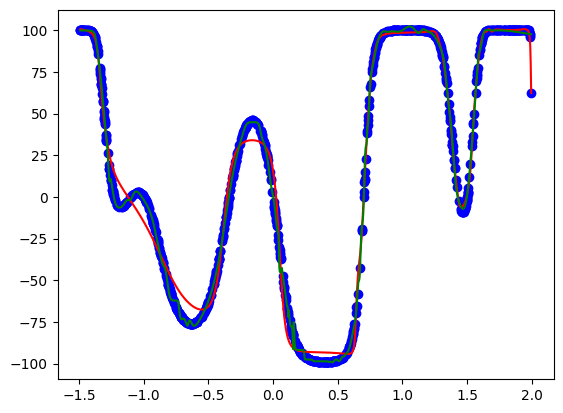

In [29]:
multimodal_test = pd.read_csv("dane_nn2/multimodal-large-test.csv")
multimodal_test.head()
X_multimodal_test = multimodal_test['x'].values.reshape(-1, 1)
y_multimodal_test = multimodal_test['y'].values.reshape(-1, 1)

y_multimodal_pred = nn_multimodal.predict(X_multimodal_test)
mse_multimodal = np.mean(np.square(y_multimodal_test - y_multimodal_pred))
print("MSE for full: ", mse_multimodal)

y_multimodal_pred = nn_multimodal2.predict(X_multimodal_test)
mse_multimodal = np.mean(np.square(y_multimodal_test - y_multimodal_pred))
print("MSE for mini-batch: ", mse_multimodal)

x = np.linspace(min(X_multimodal_test), max(X_multimodal_test), 1000)

plt.scatter(X_multimodal_test, y_multimodal_test, color='blue')
plt.plot(x, nn_multimodal.predict(x), color='red')
plt.plot(x, nn_multimodal2.predict(x), color='green')
plt.show()